<a href="https://colab.research.google.com/github/sudarshansb143/Machine-Learning-Models/blob/master/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as ws
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import warnings as ws
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

In [24]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
# Checking for null values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [26]:
num_col = df[['age',
  'creatinine_phosphokinase',
  'ejection_fraction',
  'platelets',
 'serum_creatinine',
 'serum_sodium',
  'time']].head()

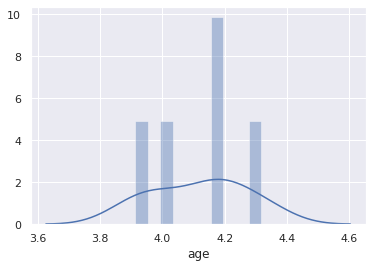

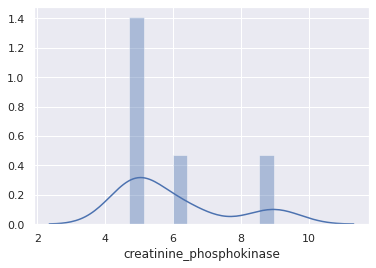

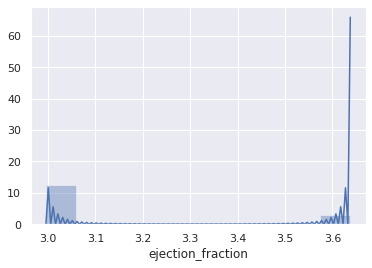

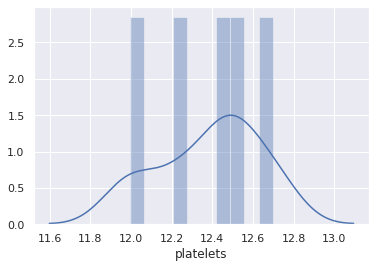

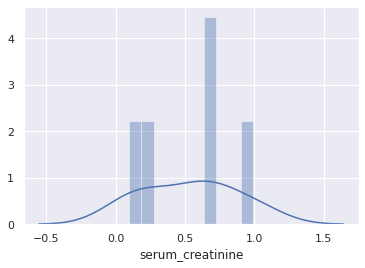

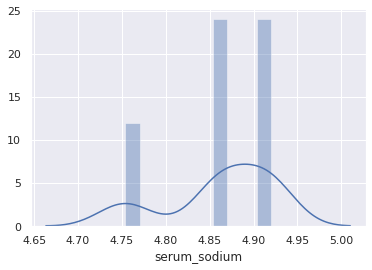

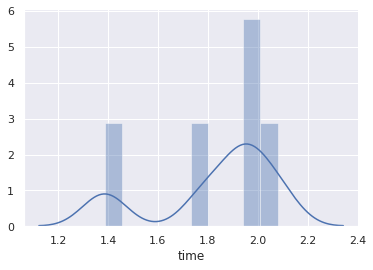

In [27]:
for i in num_col.columns.to_list():
  sns.set()
  sns.distplot(np.log(num_col[i]), bins = 10)
  plt.show()

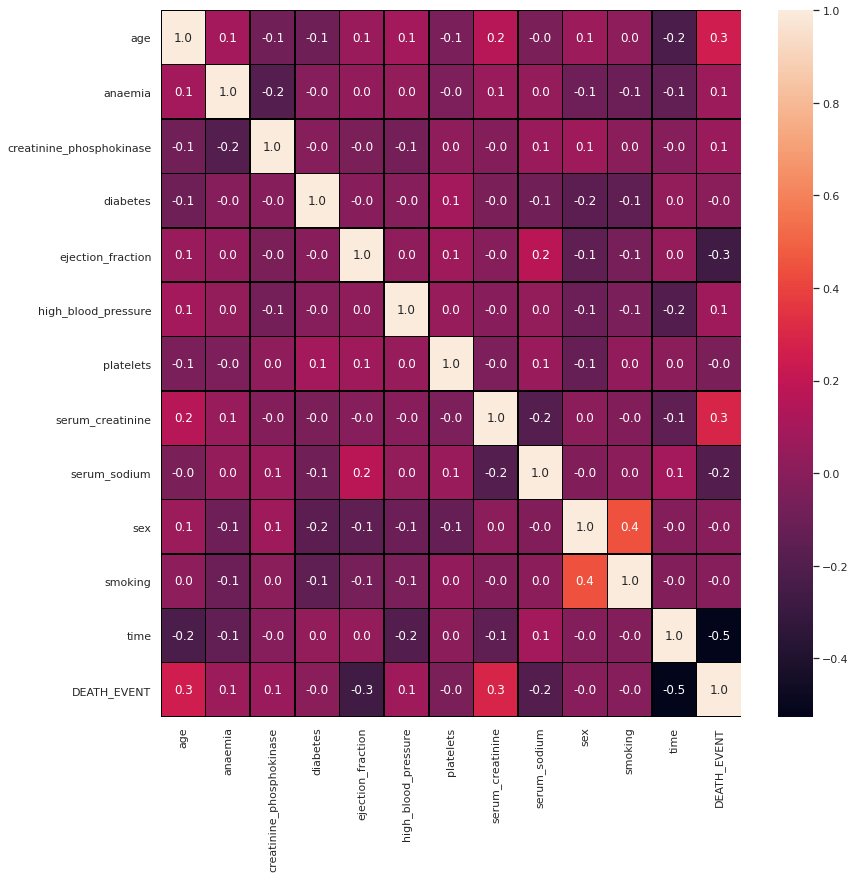

In [28]:
sns.set()
plt.figure(figsize= (13,13))
sns.heatmap(df.corr(), annot =True, linecolor='black', linewidths=0.5, fmt = '1.1f')
plt.show()

In [31]:
# Trying to fit the baseline models
classifiers = [
               LogisticRegression(),
               KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB()
]

In [32]:
X = df.drop("DEATH_EVENT", axis = 1)
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)                                                                                                                                                                                                  

In [34]:
X_test_scaled = scaler.transform(X_test)

In [44]:

from sklearn.metrics import accuracy_score
for i in classifiers:
  score = cross_val_score(i, X_train_scaled, y_train, cv =5)
  i.fit(X_train_scaled, y_train)
  y_pred = i.predict(X_test_scaled)
  acc = accuracy_score(y_test,y_pred)

  print(i.__class__.__name__, "Has cvs of", round(score.mean(),2) , " accuracy score of  ", round(acc,2) )

LogisticRegression Has cvs of 0.84  accuracy score of   0.82
KNeighborsClassifier Has cvs of 0.76  accuracy score of   0.7
SVC Has cvs of 0.81  accuracy score of   0.77
DecisionTreeClassifier Has cvs of 0.76  accuracy score of   0.73
RandomForestClassifier Has cvs of 0.86  accuracy score of   0.83
GaussianNB Has cvs of 0.75  accuracy score of   0.7


In [45]:
# Now we will go forward with the  RandomForest

In [46]:
rfe = RandomForestClassifier(max_depth = 6, n_estimators=200, n_jobs = -1)
rfe.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [47]:
y_pred = rfe.predict(X_test_scaled)

In [48]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[38  3]
 [ 8 11]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



In [50]:
accuracy_score(y_test, y_pred)

0.8166666666666667

In [51]:

m = RandomForestClassifier(max_features=0.5,max_depth = 3,random_state = 1)
m.fit(X_train_scaled,y_train)
m_pred = m.predict(X_test_scaled)
print(classification_report(y_test, m_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



In [52]:
print(confusion_matrix(y_test, m_pred))

[[40  1]
 [10  9]]


In [53]:
accuracy_score(y_test, m_pred)

0.8166666666666667

We deal with imbalanced classification problem so accuracy is not really useful metric. Lets try f1-score and see results

In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("F1 Score", f1_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall score", recall_score(y_test, y_pred))

F1 Score 0.6666666666666667
Precision 0.7857142857142857
Recall score 0.5789473684210527


In [55]:
rfe.feature_importances_

array([0.06417845, 0.01043718, 0.06720036, 0.01050683, 0.13986105,
       0.01349222, 0.06974525, 0.14907043, 0.06431002, 0.00911253,
       0.01156363, 0.39052205])

In [56]:
logreg =  LogisticRegression() 
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = logreg.predict(X_test_scaled)

In [58]:
print(confusion_matrix(y_pred, y_test))

[[38  8]
 [ 3 11]]


In [63]:
svm = SVC( random_state = 42)
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
y_predict = svm.predict(X_test_scaled)

In [65]:
print(confusion_matrix(y_test, y_predict))

[[38  3]
 [11  8]]
